## Titanic Survival Prediction Using Logistic Regression by Siddhartha Biswas

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
df=pd.read_csv("C:\\Users\\MSI PC\\Desktop\\Encryptix\\Titanic\\Titanic-Dataset.csv")

In [3]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## **E.D.A. & Missing Value Treatment**

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

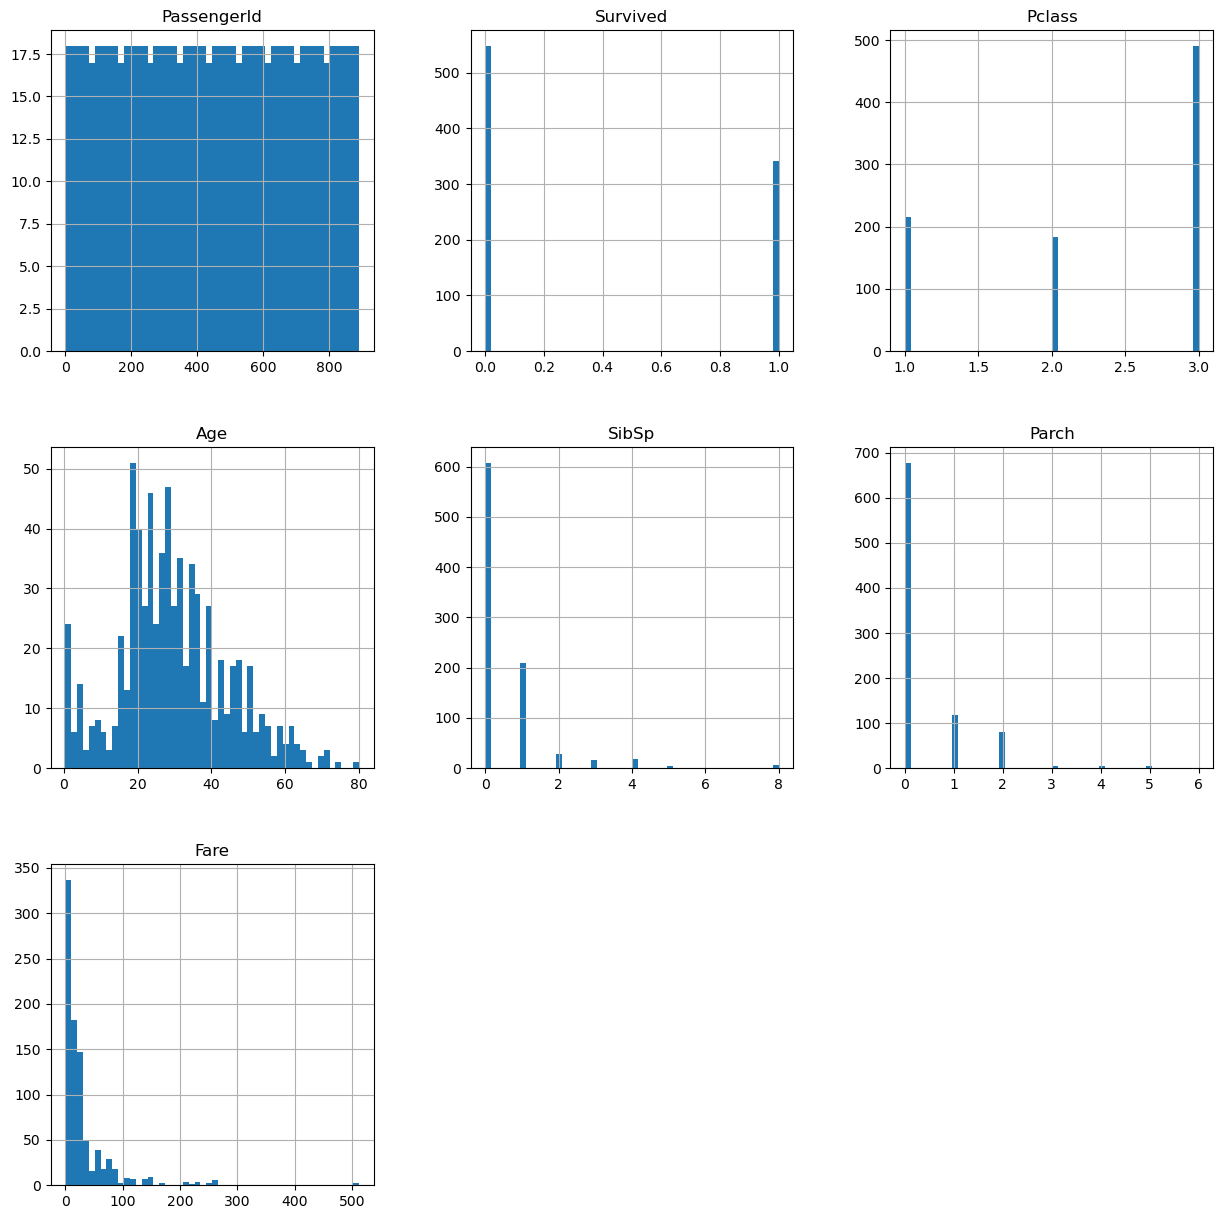

In [5]:
df.hist(bins=50,figsize=(15,15))
plt.show()

In [6]:
#df['Total_Membars']=df['Parch']+df['SibSp']+1

,Age
Pclass,
1,37.0
2,29.0
3,24.0


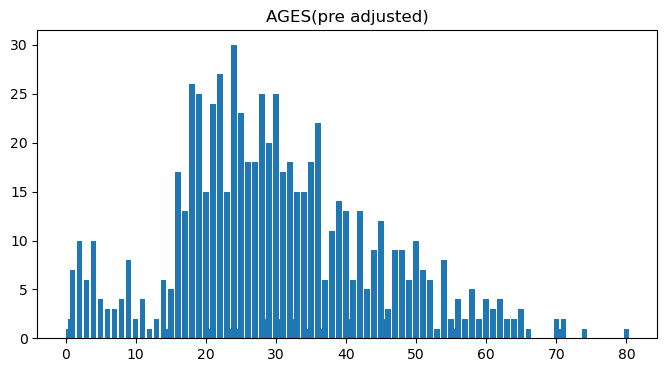

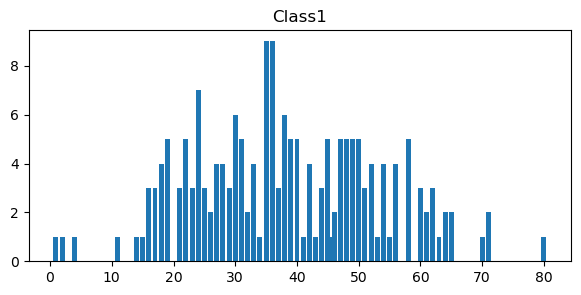

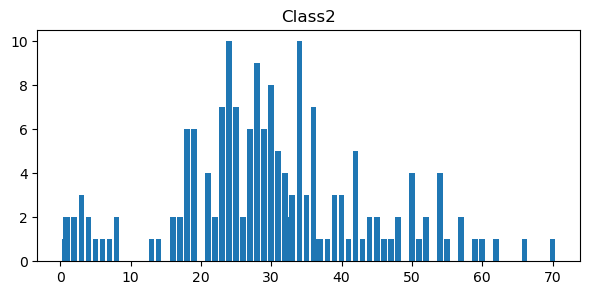

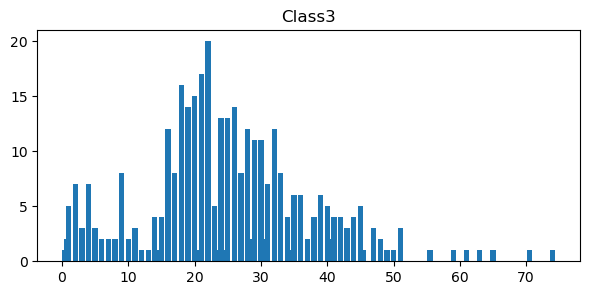

In [7]:
y1= df['Age'].value_counts()
x1=y1.index.values

plt.figure(figsize=(8,4))
plt.title("AGES(pre adjusted)")
plt.bar(x1,y1)

#sns.countplot(data=df,x='Age')

for i in range(1,4):
    plt.figure(figsize=(7,3))
    plt.title("Class"+str(i))
    yi=df[df['Pclass']==i]['Age'].value_counts()
    xi=yi.index.values
    plt.bar(xi,yi)
median = df[['Pclass','Age']].groupby('Pclass').median()
median

In [8]:
df[df['Pclass']==1]['Age'].median()

37.0

In [9]:
#M.V. Age(1)
for i in range(1,4):
    idx = np.where( (df['Pclass']== i) & (df['Age'].isnull()) )[0]
    #df.loc[idx,'Age'] = median.values[i][0]
    #df['Age'].loc[idx] = median['Age'].iloc[i-1]
    df.loc[idx,'Age'] = median['Age'].iloc[i-1]
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#M.V. Embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
sim_emb = df[ (df['Pclass'] == 1) & (df['Fare'] >= 70) & (df['Fare'] <= 90)]['Embarked']
print(sim_emb.value_counts())
df['Embarked'].fillna('C',inplace = True)#Replacing MVs with modal embarked place

Embarked
S    20
C    19
Q     2
Name: count, dtype: int64


C:\Users\MSI PC\AppData\Local\Temp\ipykernel_2764\4245639092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('C',inplace = True)#Replacing MVs with modal embarked place


<Axes: xlabel='Embarked', ylabel='count'>

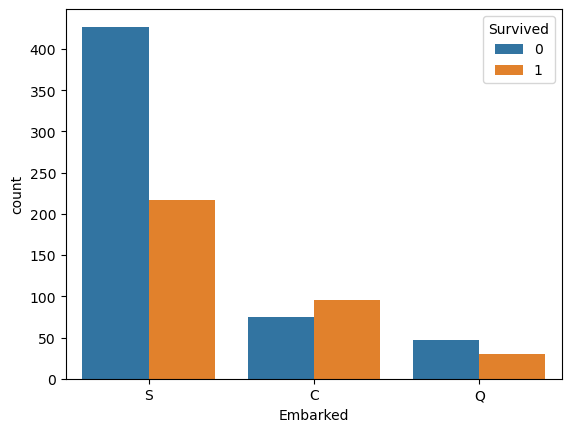

In [14]:
sns.countplot(data= df, x='Embarked', hue = 'Survived')

C = Cherbourg, Q = Queenstown, S = Southampton

<Axes: xlabel='Fare'>

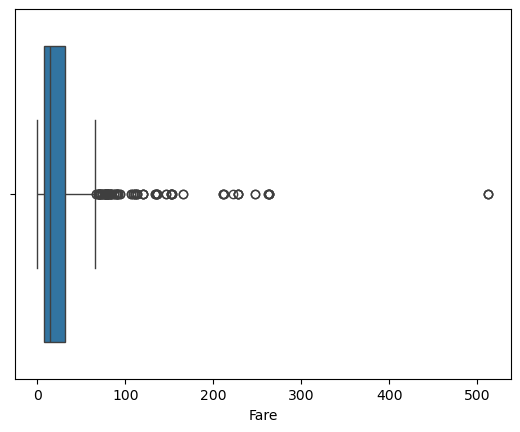

In [15]:
sns.boxplot(x=df['Fare'])

In [16]:
df['Cabin'].fillna('M',inplace = True)
df['Cabin']=df['Cabin'].str[0] #Taking 1st chr of str
idx = np.where(df['Cabin'].str[0]=='T')[0]
df.loc[idx, 'Cabin'] = 'M'#To replace T w/ M
#df['Cabin'].str[0].replace(to_replace='T',value='M')
print(df['Cabin'].value_counts())

Cabin
M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64


C:\Users\MSI PC\AppData\Local\Temp\ipykernel_2764\2825945151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace = True)


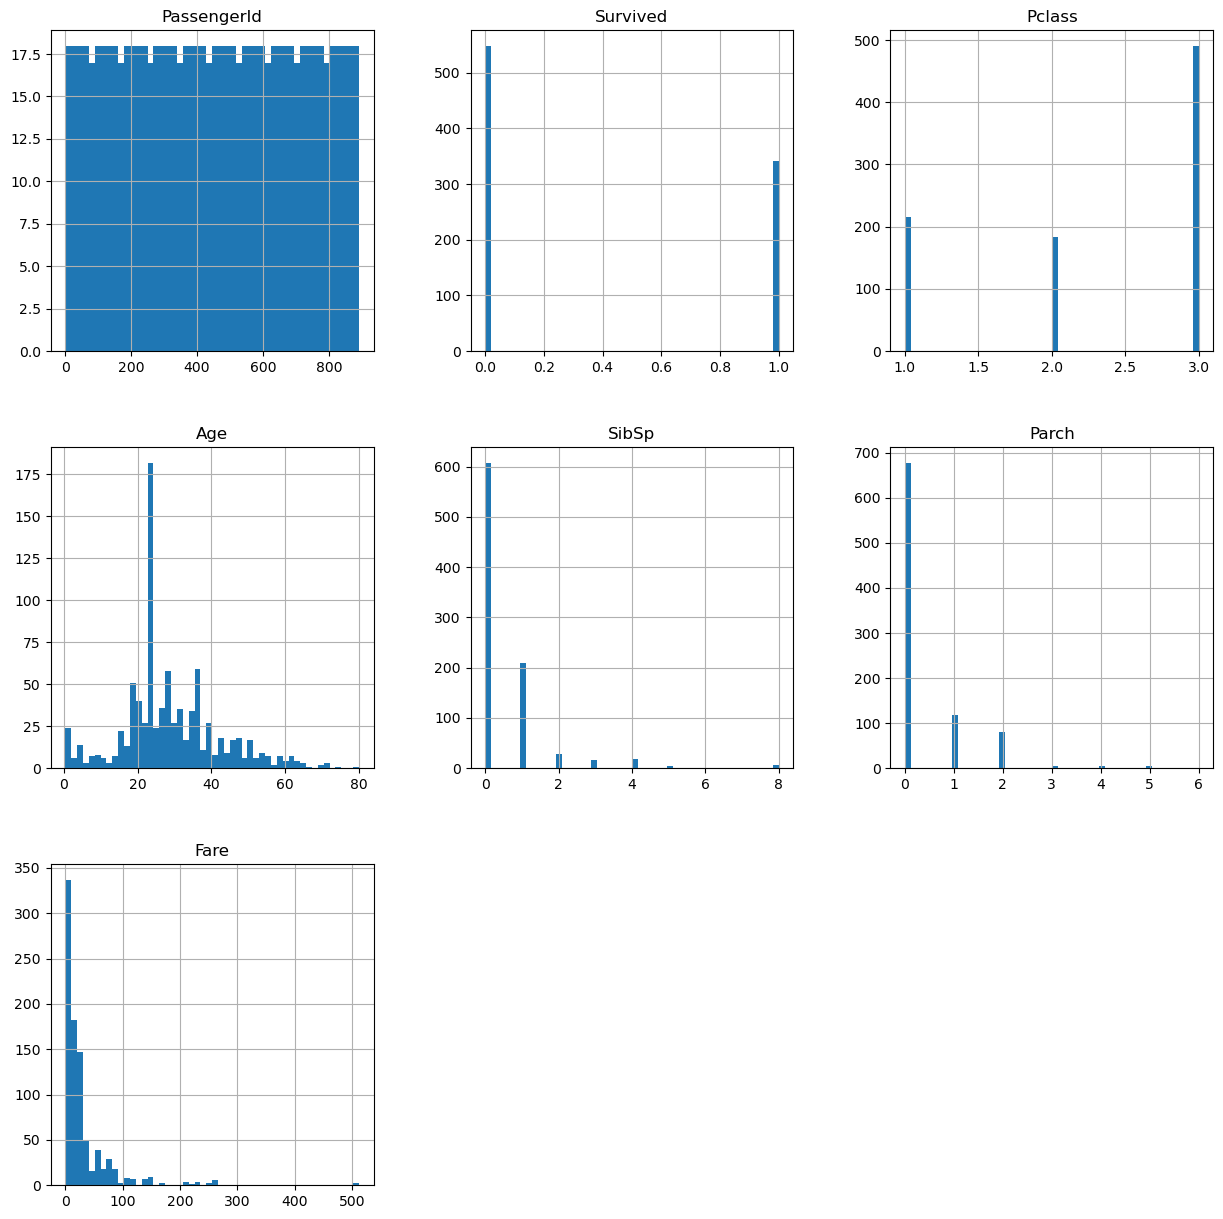

In [17]:
df.hist(bins=50,figsize=(15,15))
plt.show()

<Axes: xlabel='Cabin', ylabel='count'>

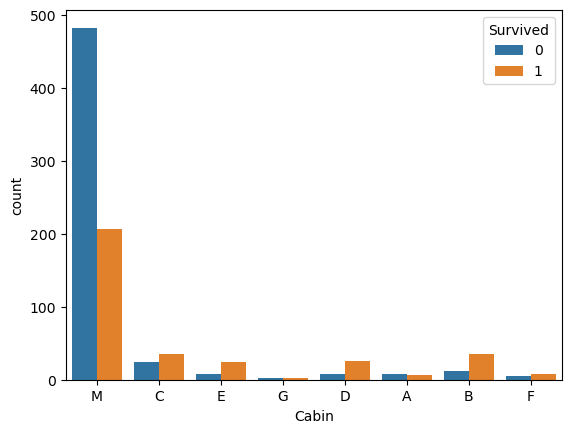

In [18]:
sns.countplot(data= df, x='Cabin', hue = 'Survived')

<Axes: xlabel='Cabin', ylabel='count'>

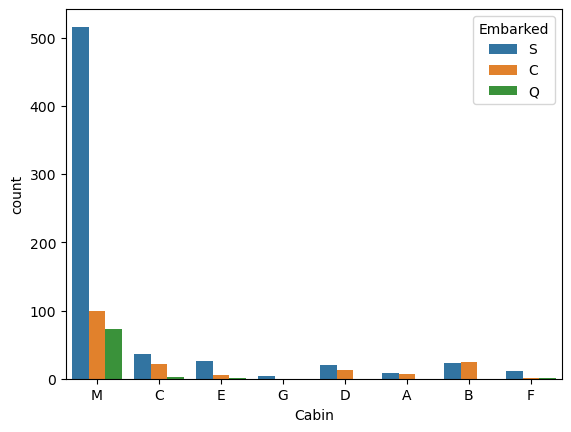

In [19]:
sns.countplot(data= df, x='Cabin', hue = 'Embarked')

In [20]:
disc1=['Name','Sex','PassengerId','Ticket','SibSp','Parch','Embarked','Cabin']
df1=df.drop(disc1,axis=1)
df1

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,24.0,23.4500
889,1,1,26.0,30.0000


<Axes: >

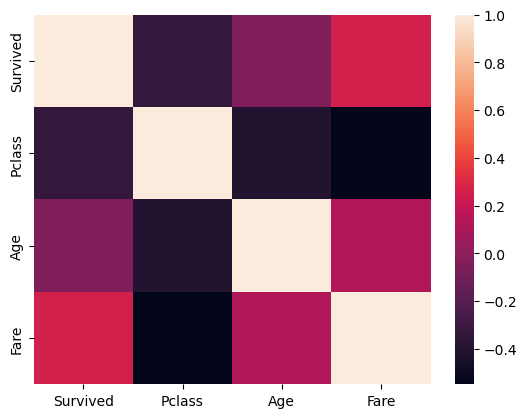

In [21]:
sns.heatmap(df1.corr())

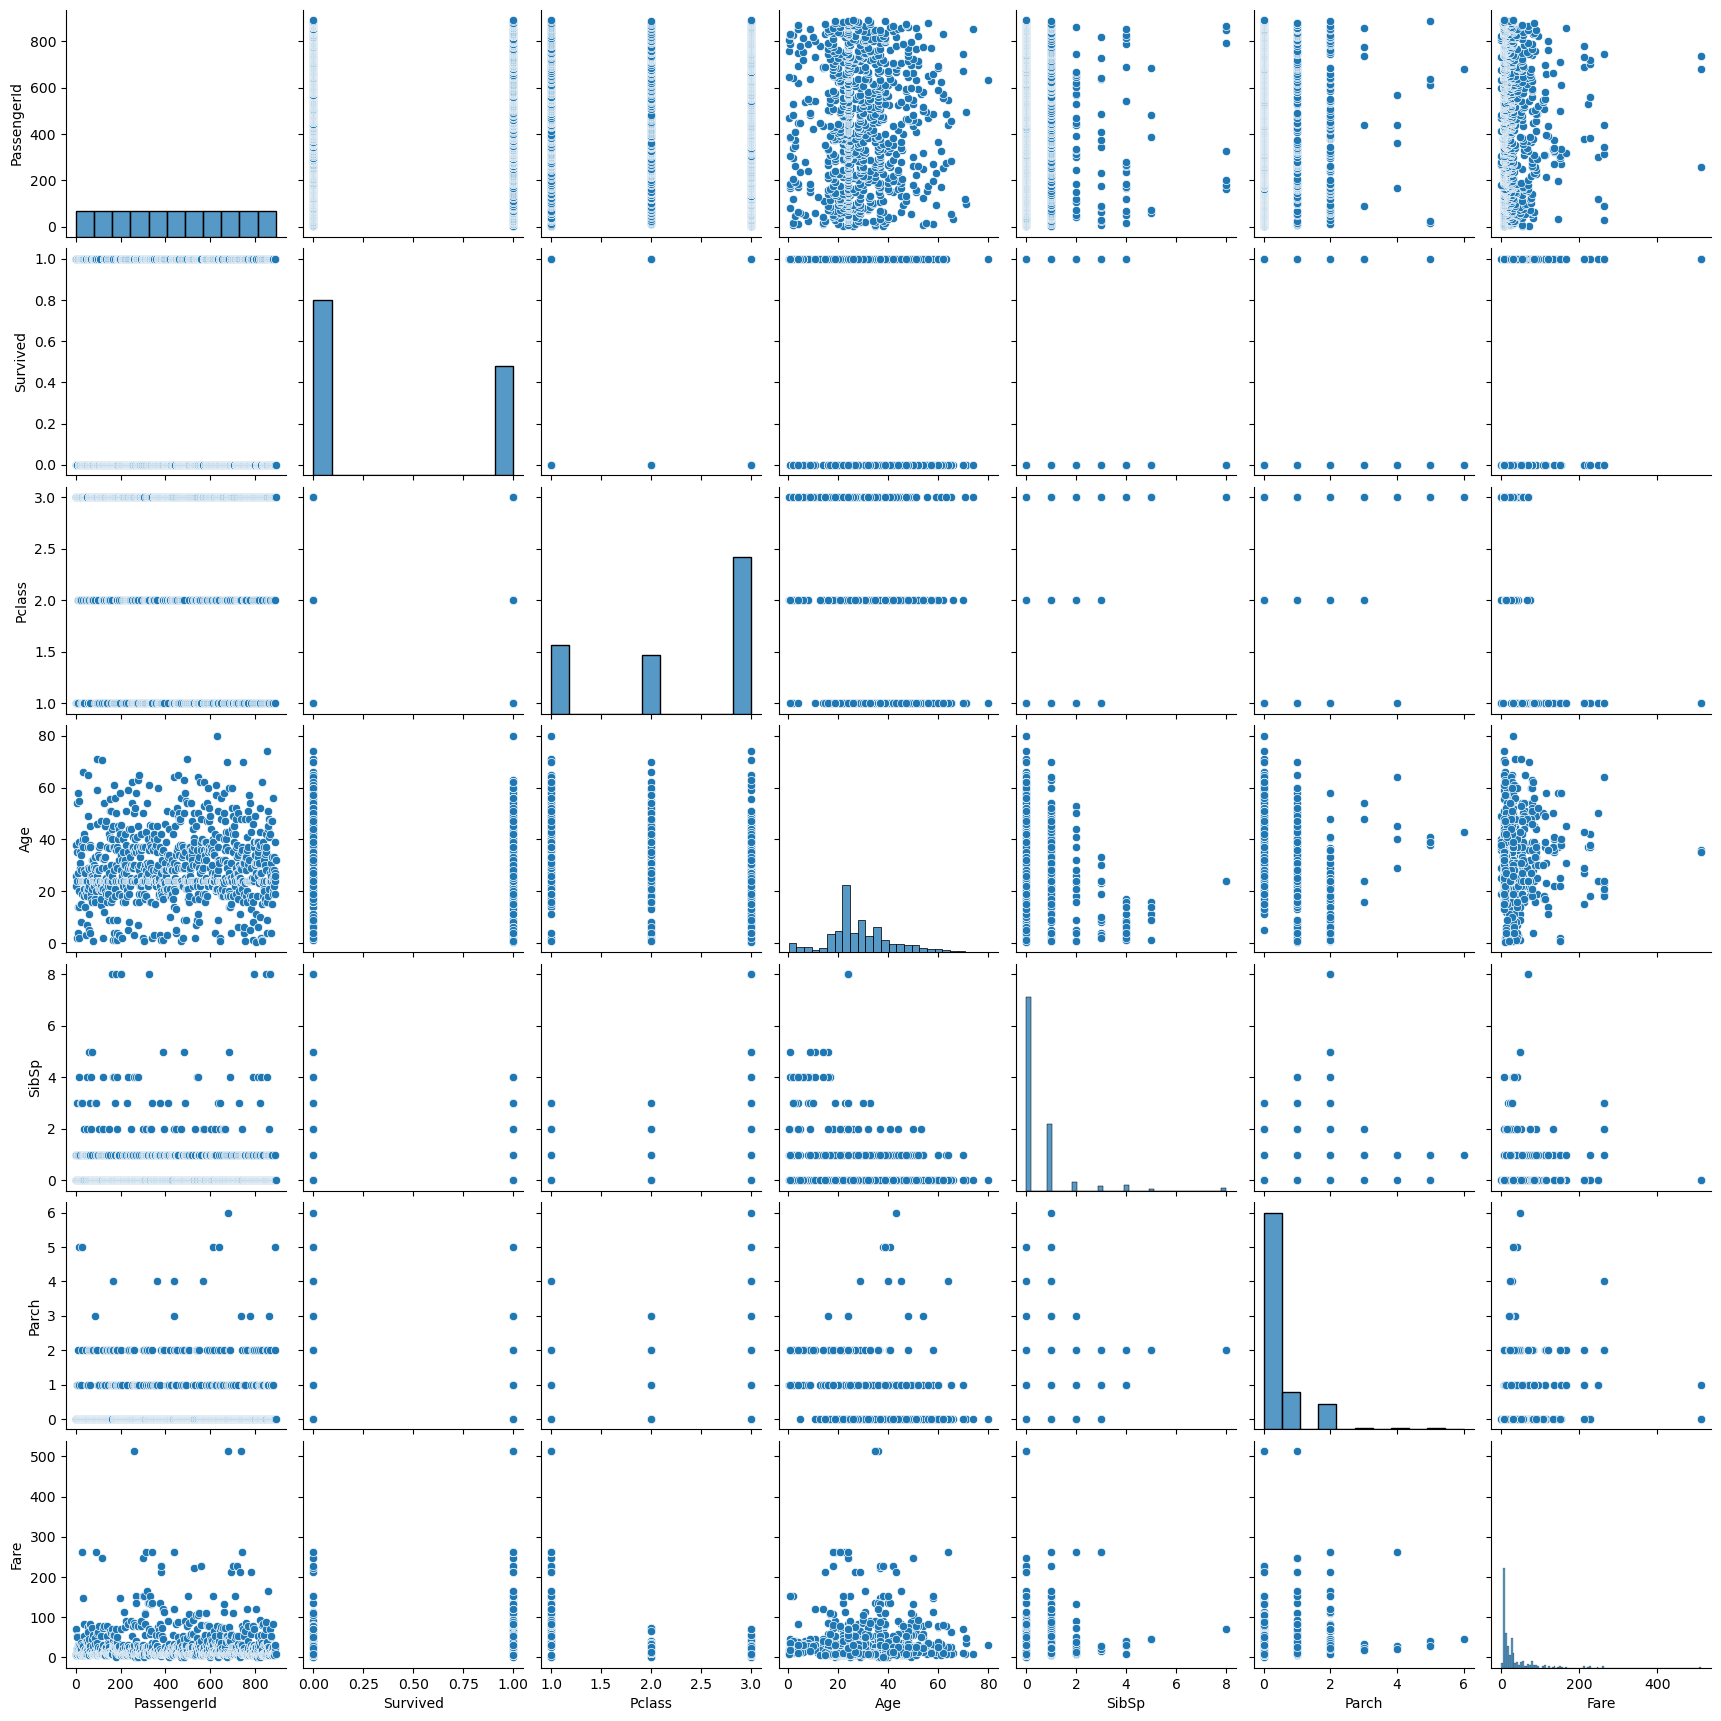

In [22]:
sns.pairplot(data=df)

## ENCODING

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Gender       891 non-null    int32  
 13  Emb_1        891 non-null    int32  
 14  Emb          891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(5)
memory usage: 94.1+ KB


In [28]:
gender=pd.get_dummies(data=df['Sex'],drop_first=True).astype(int)#both distinct column are similar, to convert boolean into int
df['Gender']=gender
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Emb_1,Emb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,2,1


In [29]:
encoder = LabelEncoder()
df['Emb_1'] = encoder.fit_transform(df['Embarked'])
df['Emb']=3-df['Emb_1']
df['Emb'].head(6)

0    1
1    3
2    1
3    1
4    1
5    2
Name: Emb, dtype: int32

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Emb_1,Emb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,1,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,0,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,M,S,0,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1,0,3


## MODEL DEPLOYMENT

**(1) Logistic Regression**

In [31]:
X= df.drop(columns=['Survived','Sex','Name','Embarked','Emb_1','Emb','Ticket','Cabin'],axis=1)
y=df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
scaler = StandardScaler()

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
scaled_X=scaler.transform(X)

*Standard Logistiic Model*

In [34]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [35]:
log_model.coef_

array([[ 0.09290037, -0.83627089, -0.48855596, -0.34211149, -0.12534674,
         0.19945467, -1.2799886 ]])

In [36]:
y_pred=log_model.predict(scaled_X_test)
y_pred
a1=np.count_nonzero(y_pred)
b1= len(y_pred)-a1
a2=np.count_nonzero(y_test)
b2= len(y_test)-a2
print("Number of 0 & 1's in y_train is",(b1,a1))
print("Number of 0 & 1's in y_test is",(b2,a2))

Number of 0 & 1's in y_train is (141, 82)
Number of 0 & 1's in y_test is (134, 89)


<Axes: xlabel='Survived', ylabel='count'>

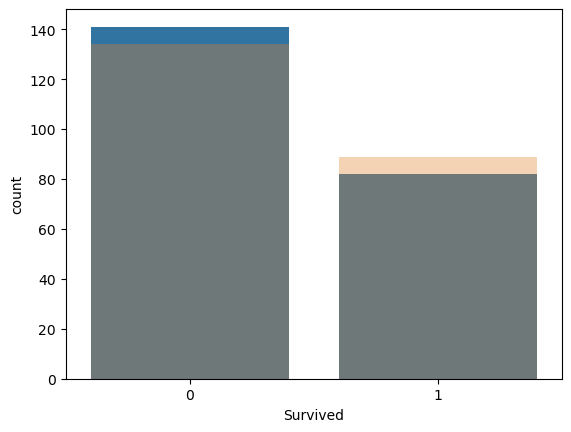

In [37]:
sns.countplot(x=y_pred)
sns.countplot(x=y_test,alpha=0.35)

In [38]:
y_pred = log_model.predict(scaled_X_test)
acs=accuracy_score(y_pred,y_test)
acsp=100*acs
print('We can say the model predicts accurately',acsp,'% of the time')

We can say the model predicts accurately 80.71748878923766 % of the time


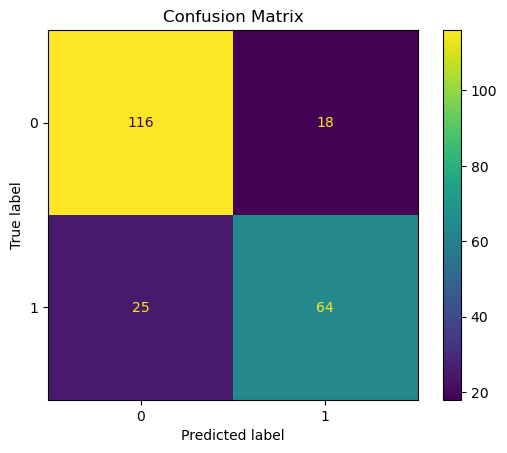

In [39]:
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)#,normalize='true')
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
cm_disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [41]:
final_model=LogisticRegression()
final_model.fit(scaled_X,y)

LogisticRegression()

In [42]:
final_model.coef_

array([[ 0.02449229, -0.94982931, -0.56156864, -0.41697684, -0.08175051,
         0.13769109, -1.29689654]])

*Logistic Model Tuning using GridSearchCV*

In [54]:
prm_grd = [ {'penalty':['l1','l2','elasticnet','none'],'C': np.logspace(1,5,10,20,50), 'solver': ['lbfgs','sag', 'liblinear','saga','newton-cg'] , 'max_iter': [100,1000,2500,5000] } ]

grd = GridSearchCV(log_model, param_grid= prm_grd, cv = 3, n_jobs = -1)

best_log_model = grd.fit(scaled_X_train,y_train)

best_y_pred = best_log_model.predict(scaled_X_test)

D:\Software Files\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1560 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Software Files\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Software Files\ANACONDA\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Software Files\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
 

<Axes: xlabel='Survived', ylabel='count'>

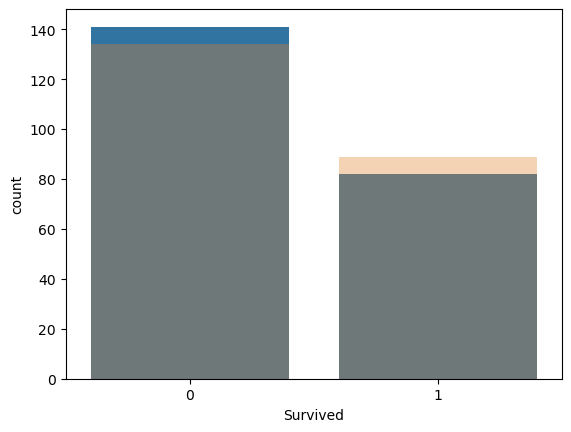

In [55]:
sns.countplot(x=best_y_pred)
sns.countplot(x=y_test,alpha=0.35)

In [56]:
print(best_log_model.best_estimator_)

LogisticRegression(C=50.0, penalty='l1', solver='liblinear')


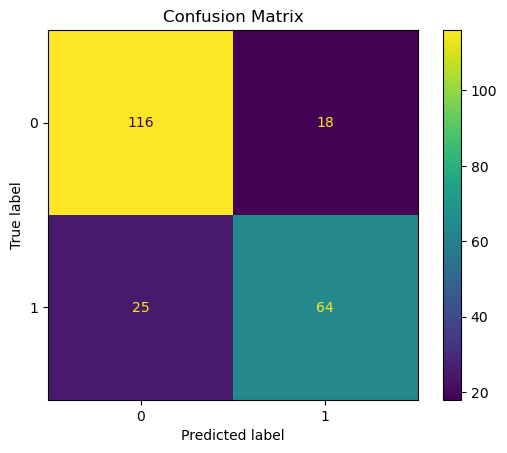

In [57]:
cm = confusion_matrix(y_test, best_y_pred, labels=best_log_model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_model.classes_)
cm_disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [58]:
acs = accuracy_score(best_y_pred,y_test)
print("Accuracy score for best fitted model is=",acs)
print(classification_report(best_y_pred,y_test))

Accuracy score for best fitted model is= 0.8071748878923767
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       141
           1       0.72      0.78      0.75        82

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



## So applying gridsearch doesn't make any change. Hence Logistic Regression will fit this data with atmost 81% accuracy.